In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("LoanApplicant.csv")

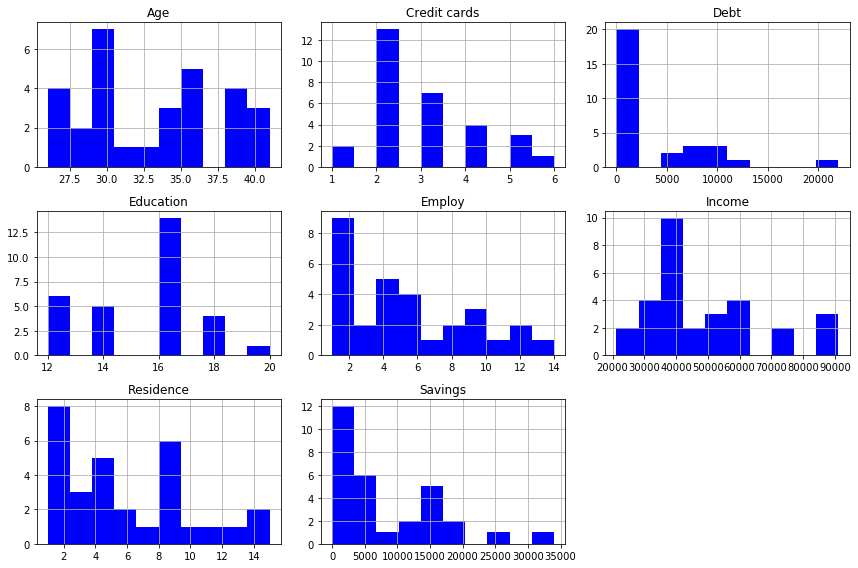

In [2]:
# (1) Generate Summary Stats
sumry = np.round(data.describe().transpose(),decimals=2)

# (2) Histograms
data.hist(grid=True, figsize=(12,8), color='blue')
plt.tight_layout()
plt.show()




In [4]:
# (3) correlation matrices
corm = data.corr().values
corm

array([[ 1.        ,  0.54871455,  0.51509166,  0.3471197 ,  0.33377154,
         0.21010533, -0.19616432, -0.05864313],
       [ 0.54871455,  1.        ,  0.22927699,  0.10774778,  0.04853683,
         0.44735911, -0.4565866 , -0.29617822],
       [ 0.51509166,  0.22927699,  1.        ,  0.83771879,  0.84802073,
         0.55241994,  0.0323862 , -0.12975798],
       [ 0.3471197 ,  0.10774778,  0.83771879,  1.        ,  0.95221573,
         0.57004382,  0.1858152 ,  0.05348158],
       [ 0.33377154,  0.04853683,  0.84802073,  0.95221573,  1.        ,
         0.53879518,  0.24667868,  0.02254348],
       [ 0.21010533,  0.44735911,  0.55241994,  0.57004382,  0.53879518,
         1.        , -0.39250146, -0.41046649],
       [-0.19616432, -0.4565866 ,  0.0323862 ,  0.1858152 ,  0.24667868,
        -0.39250146,  1.        ,  0.47431532],
       [-0.05864313, -0.29617822, -0.12975798,  0.05348158,  0.02254348,
        -0.41046649,  0.47431532,  1.        ]])

In [7]:
# (4) Various Tests for PCA suitability
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(data)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)

In [8]:
# (5) Tranform data
data_std = StandardScaler().fit_transform(data) 

# (6) Run the PCA Method
n_components = 8
pca = PCA(n_components).fit(data)

eigenvectors = np.round(pca.components_.transpose(),decimals=3)

eigenvalues = pca.explained_variance_

loadings= (np.sqrt(eigenvalues)*-1)*eigenvectors

In [9]:
loadings

array([[-1.84619765e+04,  1.17351846e+03, -1.11386658e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         5.88153301e-01, -3.56814812e-01, -1.37327868e+00,
         5.93430534e-02, -9.06971217e-02],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -2.72124450e+00, -1.25842492e+00,  6.01435917e-02,
        -2.08203594e-01,  1.27425708e-02],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -2.25320701e+00,  8.82463950e-01, -3.85205385e-01,
        -4.72732798e-02,  4.57233424e-01],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -2.07510425e+00,  5.72644259e-01, -4.72556792e-02,
         3.80197867e-01, -5.28441908e-01],
       [-2.31240918e+03, -8.12897097e+03, -1.28762976e+03,
         4.14192465e-03, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [ 1.17485305e+03,  2.424129

In [10]:
eigenvalues

array([3.47765102e+08, 7.33734129e+07, 1.98511800e+07, 1.71555398e+01,
       3.02954932e+00, 2.05059616e+00, 1.01166274e+00, 5.61844675e-01])